In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/drive/MyDrive/1613615-Stock_Price_data_set.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
training_set=data.iloc[:,1:2].values
training_set

array([[262.      ],
       [247.699997],
       [266.579987],
       ...,
       [448.25    ],
       [421.440002],
       [407.309998]])

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.06125254],
       [0.03005911],
       [0.07124314],
       ...,
       [0.46753051],
       [0.4090483 ],
       [0.3782257 ]])

Creating a data structure with 60 time stamp and 1 output 

In [8]:
X_train=[]
Y_train=[]
for i in range(60,1009):
   # X_train will contain the 60 values from rows 0 to 60 columns
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i, 0])
# Converting list to ndarray
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [9]:
X_train[0][0]

0.06125254313102535

In [10]:
X_train.shape 

(949, 60)

In [11]:
type(X_train)

numpy.ndarray

**Reshaping**

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
regressorr = Sequential()

Adding the first LSTM Layer and some Dropout regularisation

In [15]:
# Units represent the dimensionality of the outer space
regressorr.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
# We are using the dropout layer to over come the over fitting problem
regressorr.add(Dropout(0.2))

Adding a second LSTM Layer and some dropout regularisation

In [16]:
regressorr.add(LSTM(units = 50, return_sequences=True))
# Dropout specify the % of layers to drop
regressorr.add(Dropout(0.2))

**Adding a third LSTM Layer and some dropout regularisation**

In [17]:
regressorr.add(LSTM(units = 50, return_sequences=True))
regressorr.add(Dropout(0.2))

**Adding a fourth LSTM Layer and some dropout regularisation**

In [18]:
regressorr.add(LSTM(units = 50))
regressorr.add(Dropout(0.2))

In [19]:
regressorr.add(Dense(units = 1))

In [20]:
regressorr.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
regressorr.fit(X_train, Y_train, epochs = 100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 12s 139ms/step - loss: 0.0318
Epoch 2/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0095
Epoch 3/100
30/30 [==============================] - 4s 137ms/step - loss: 0.0098
Epoch 4/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0075
Epoch 5/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0073
Epoch 6/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0067
Epoch 7/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0062
Epoch 8/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0060
Epoch 9/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0061
Epoch 10/100
30/30 [==============================] - 4s 137ms/step - loss: 0.0064
Epoch 11/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0056
Epoch 12/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0053
Epoch 13/100

**Making the Prediction and Visualizing the Result**

In [46]:
real_stock_price = data.iloc[:, 1:2].values

In [25]:
dataset_total= data[('Open')]

In [27]:
inputs=dataset_total[len(dataset_total)-60:].values

In [28]:
print(len(inputs), inputs.shape)

60 (60,)


In [29]:
# Creating the test data into 2d array shape
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [39]:
X_test = []
for i in range(50, 60):
  X_test.append(inputs[i-50:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
X_test.shape

(10, 50, 1)

In [42]:
predicted_stock_price = regressorr.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [43]:
predicted_stock_price.shape

(10, 1)

**Visualizing The Result**

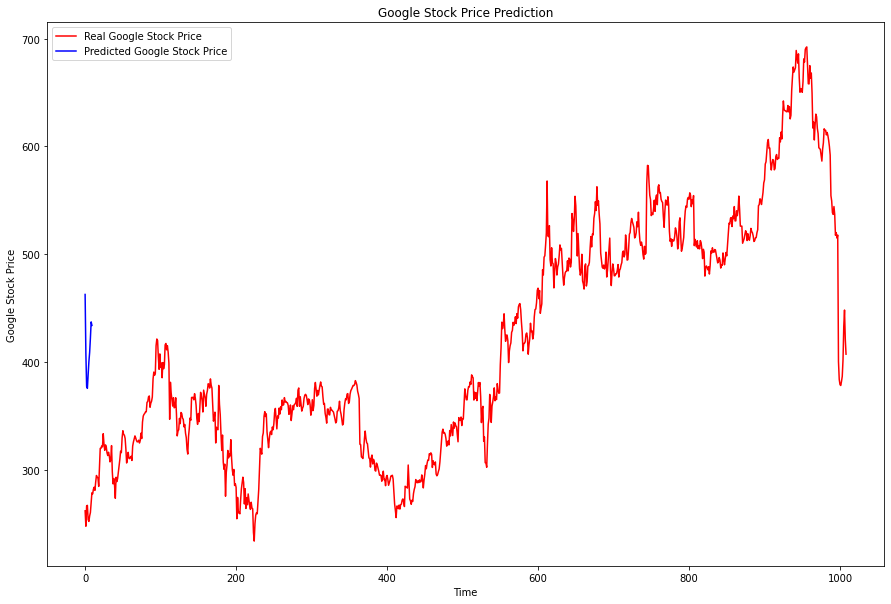

In [47]:
plt.figure(figsize=(15,10))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()